# 🌿 Comprehensive Vegetation Health Analysis

## Beyond NDVI: Multiple Indices for Precision Agriculture

Welcome to Tutorial 2! In this notebook, you'll learn:

1. **Why Multiple Indices?** - Different tools for different situations
2. **The Five Key Indices** - NDVI, EVI, SAVI, NDRE, GNDVI
3. **Side-by-Side Comparison** - See the differences on real data
4. **Decision Framework** - Which index should you use and when?
5. **Real-World Scenarios** - Practical agricultural applications

**Prerequisites:** Complete the NDVI Tutorial first to understand the basics!

---


## 📚 Part 1: Why Do We Need Multiple Indices?

### The Problem with "One Size Fits All"

NDVI is great for general vegetation monitoring, but it has limitations:

❌ **Saturation Problem**: In dense vegetation (NDVI > 0.7), it becomes less sensitive to changes  
❌ **Soil Background**: Exposed soil can interfere with readings in sparse vegetation  
❌ **Atmospheric Effects**: Haze and atmospheric conditions affect accuracy  
❌ **Limited Specificity**: Can't distinguish between different types of plant stress  

### The Solution: Specialized Indices

| Index | Solves This Problem | Best Used For |
|-------|---------------------|---------------|
| **NDVI** | *(baseline)* | General vegetation health |
| **EVI** | Saturation in dense vegetation | Forests, mature dense crops |
| **SAVI** | Soil background interference | Early season, sparse vegetation |
| **NDRE** | Need higher sensitivity | Precision nitrogen management |
| **GNDVI** | Chlorophyll-specific sensing | Photosynthetic activity |

**Think of them as different lenses on the same camera** - each reveals something unique about crop health!


---

## 🔧 Part 2: Setup

Let's import our tools and get ready for multi-index analysis!


In [1]:
# Import the vegetation indices tools
from precision_ag.vegetation_indices import (
    VegetationIndexComputer,
    compute_vegetation_indices_for_aoi
)
import numpy as np
import matplotlib.pyplot as plt

# Set up nice plotting
plt.style.use('default')
%matplotlib inline

print("✅ All imports successful!")
print("\nReady for comprehensive vegetation analysis! 🌾")

✅ All imports successful!

Ready for comprehensive vegetation analysis! 🌾


---

## 📖 Part 3: Understanding Each Index

Let's dive deep into each of the five vegetation indices.


### 3.1 NDVI - The Standard

**Normalized Difference Vegetation Index**

$$
NDVI = \frac{NIR - Red}{NIR + Red}
$$

**Bands Used:** Red (B04), NIR (B08)

**What It Measures:**
- General vegetation health and vigor
- Based on chlorophyll absorption (Red) and leaf structure reflection (NIR)

**Strengths:**
- ✅ Simple and well-understood
- ✅ Works for most vegetation types
- ✅ Extensive research and validation
- ✅ Easy to interpret

**Limitations:**
- ⚠️ Saturates in dense vegetation (>0.7)
- ⚠️ Sensitive to soil background
- ⚠️ Affected by atmospheric conditions

**Best For:** General-purpose vegetation monitoring, baseline comparisons


### 3.2 EVI - For Dense Vegetation

**Enhanced Vegetation Index**

$$
EVI = 2.5 \times \frac{NIR - Red}{NIR + 6 \times Red - 7.5 \times Blue + 1}
$$

**Bands Used:** Blue (B02), Red (B04), NIR (B08)

**What It Measures:**
- Vegetation health with atmospheric correction
- Improved sensitivity in high biomass areas

**Strengths:**
- ✅ Doesn't saturate in dense vegetation
- ✅ Reduces atmospheric interference
- ✅ Better for forests and mature crops

**Best For:** Dense forests, mature crops, when NDVI values are consistently high (>0.6)


### 3.3 SAVI - For Sparse Vegetation

**Soil Adjusted Vegetation Index**

$$
SAVI = \frac{(NIR - Red)}{(NIR + Red + L)} \times (1 + L)
$$

where **L = 0.5** (soil brightness correction factor)

**Bands Used:** Red (B04), NIR (B08)

**What It Measures:**
- Vegetation health corrected for soil brightness
- Minimizes soil background effects

**Strengths:**
- ✅ Reduces soil brightness interference
- ✅ Works well in sparse vegetation
- ✅ Great for early season monitoring

**Best For:** Early season crops, arid regions, sparse grasslands, when significant soil is visible


### 3.4 NDRE - The Precision Tool 🎯

**Normalized Difference Red Edge** *(Sentinel-2 only!)*

$$
NDRE = \frac{NIR - RedEdge}{NIR + RedEdge}
$$

**Bands Used:** Red Edge (B05), NIR (B08)

**What It Measures:**
- Chlorophyll content (very sensitive!)
- Directly related to nitrogen status

**Strengths:**
- ✅ **Highly sensitive** to chlorophyll variations
- ✅ Detects stress before visible symptoms
- ✅ Excellent for nitrogen management
- ✅ Linear relationship with chlorophyll content

**Limitations:**
- ⚠️ **Sentinel-2 only** (Landsat lacks Red Edge bands)

**Best For:** 🎯 Variable rate nitrogen application, early disease detection, precision agriculture

💡 **Pro Tip:** NDRE is a game-changer for precision ag! It's one of the main reasons to use Sentinel-2 over Landsat.


### 3.5 GNDVI - Nitrogen Status

**Green Normalized Difference Vegetation Index**

$$
GNDVI = \frac{NIR - Green}{NIR + Green}
$$

**Bands Used:** Green (B03), NIR (B08)

**What It Measures:**
- Chlorophyll concentration
- Photosynthetic activity

**Strengths:**
- ✅ More sensitive to chlorophyll than NDVI
- ✅ Good for nitrogen status assessment
- ✅ Works with both Sentinel-2 and Landsat

**Best For:** Nitrogen deficiency detection, mid-season crop monitoring, photosynthetic rate estimation


---

## 🔬 Part 4: Hands-On Analysis

Let's see these indices in action!


In [2]:
# Initialize the computer for Sentinel-2
computer = VegetationIndexComputer(collection="sentinel-2-l2a")

print("✅ Vegetation Index Computer initialized")
print(f"   Collection: {computer.collection}")
print(f"   Available indices: {computer.get_available_indices()}")


✅ Vegetation Index Computer initialized
   Collection: sentinel-2-l2a
   Available indices: ['ndvi', 'evi', 'savi', 'ndre', 'gndvi']


In [3]:
# Display detailed information about all indices
computer.print_index_info()



VEGETATION INDICES - Collection: sentinel-2-l2a

NDVI - Normalized Difference Vegetation Index
Status: ✅ Available
Formula: (NIR - Red) / (NIR + Red)
Range: (-1, 1)
Best for: General purpose vegetation monitoring

EVI - Enhanced Vegetation Index
Status: ✅ Available
Formula: 2.5 * (NIR - Red) / (NIR + 6*Red - 7.5*Blue + 1)
Range: (-1, 1)
Best for: Dense vegetation, reduced atmospheric effects

SAVI - Soil Adjusted Vegetation Index
Status: ✅ Available
Formula: ((NIR - Red) / (NIR + Red + L)) * (1 + L), L=0.5
Range: (-1, 1)
Best for: Sparse vegetation, early season crops, exposed soil

NDRE - Normalized Difference Red Edge
Status: ✅ Available
Formula: (NIR - RedEdge) / (NIR + RedEdge)
Range: (-1, 1)
Best for: Precision nitrogen management, disease detection
Note: Sentinel-2 only (requires Red Edge bands)

GNDVI - Green Normalized Difference Vegetation Index
Status: ✅ Available
Formula: (NIR - Green) / (NIR + Green)
Range: (-1, 1)
Best for: Nitrogen status, photosynthetic activity



### Define Your Area of Interest


In [4]:
# Define AOI - agricultural area
# You can modify these coordinates for your own area!
aoi = [
    (-121.0, 37.0),
    (-120.5, 37.0),
    (-120.5, 37.4),
    (-121.0, 37.4)
]

# Or use a smaller area for faster processing:
# Kansas agricultural area
aoi_kansas = [
    (-96.633579, 38.402637),
    (-96.637419, 38.446126),
    (-96.562589, 38.447137),
    (-96.556855, 38.40154)
]

# Choose which AOI to use
selected_aoi = aoi_kansas  # Change to 'aoi' for larger area

print("📍 Area of Interest defined")
print(f"   Polygon with {len(selected_aoi)} vertices")


📍 Area of Interest defined
   Polygon with 4 vertices


### Search for Satellite Data


In [5]:
# Define time period
start_date = "2024-06-01"
end_date = "2024-06-30"

# Load AOI
aoi_geometry = computer.load_aoi(selected_aoi)
print("✅ AOI loaded")

# Search for data
print(f"\n🔎 Searching for imagery from {start_date} to {end_date}...")
items = computer.search_satellite_data(
    aoi_geometry=aoi_geometry,
    start_date=start_date,
    end_date=end_date,
    max_cloud_cover=20
)

if items:
    print(f"\n📅 Found {len(items)} scenes. First few:")
    for i, item in enumerate(items[:3], 1):
        print(f"   {i}. {item.datetime.strftime('%Y-%m-%d')} - Cloud: {item.properties.get('eo:cloud_cover', 'N/A')}%")
else:
    print("⚠️ No scenes found. Try adjusting date range or location.")


✅ AOI loaded

🔎 Searching for imagery from 2024-06-01 to 2024-06-30...
Found 3 scenes matching criteria

📅 Found 3 scenes. First few:
   1. 2024-06-17 - Cloud: 2.991251%
   2. 2024-06-12 - Cloud: 0.231545%
   3. 2024-06-12 - Cloud: 0.000637%


### Compute All Five Indices

Watch how the module efficiently loads each band only once!


In [6]:
if items:
    # Select first scene
    selected_item = items[0]
    
    print(f"📸 Processing: {selected_item.id}")
    print(f"   Date: {selected_item.datetime.strftime('%Y-%m-%d')}")
    print()
    
    # Compute all 5 indices at once!
    results = computer.compute_indices(
        item=selected_item,
        aoi_geometry=aoi_geometry,
        indices=['ndvi', 'evi', 'savi', 'ndre', 'gndvi'],
        output_dir="tutorial_output"
    )
    
    print("\n✅ All indices computed successfully!")
else:
    print("⚠️ No scenes to process")
    results = None


📸 Processing: S2B_MSIL2A_20240617T170849_R112_T14SPH_20240617T223406
   Date: 2024-06-17


Processing scene: S2B_MSIL2A_20240617T170849_R112_T14SPH_20240617T223406
Date: 2024-06-17 17:08:49.024000+00:00
Computing indices: ndvi, evi, savi, ndre, gndvi
Loading bands: blue, green, nir, red, rededge
    Resampling rededge from (256, 182) to (511, 363)
  Computing NDVI...
    Saved to: tutorial_output/ndvi_S2B_MSIL2A_20240617T170849_R112_T14SPH_20240617T223406.tif
  Computing EVI...
    Saved to: tutorial_output/evi_S2B_MSIL2A_20240617T170849_R112_T14SPH_20240617T223406.tif
  Computing SAVI...
    Saved to: tutorial_output/savi_S2B_MSIL2A_20240617T170849_R112_T14SPH_20240617T223406.tif
  Computing NDRE...
    Saved to: tutorial_output/ndre_S2B_MSIL2A_20240617T170849_R112_T14SPH_20240617T223406.tif
  Computing GNDVI...
    Saved to: tutorial_output/gndvi_S2B_MSIL2A_20240617T170849_R112_T14SPH_20240617T223406.tif
✅ All indices computed successfully!


✅ All indices computed successfully!


/Users/chris/projects/precision-ag/precision-ag/vegetation_indices.py:389: RuntimeWarning: invalid value encountered in divide
  (nir - red) / denominator,
/Users/chris/projects/precision-ag/precision-ag/vegetation_indices.py:421: RuntimeWarning: invalid value encountered in divide
  (nir - rededge) / denominator,
/Users/chris/projects/precision-ag/precision-ag/vegetation_indices.py:431: RuntimeWarning: invalid value encountered in divide
  (nir - green) / denominator,


---

## 📊 Part 5: Visual Comparison

Let's see the differences side-by-side!


Figure saved to: tutorial_output/comparison.png


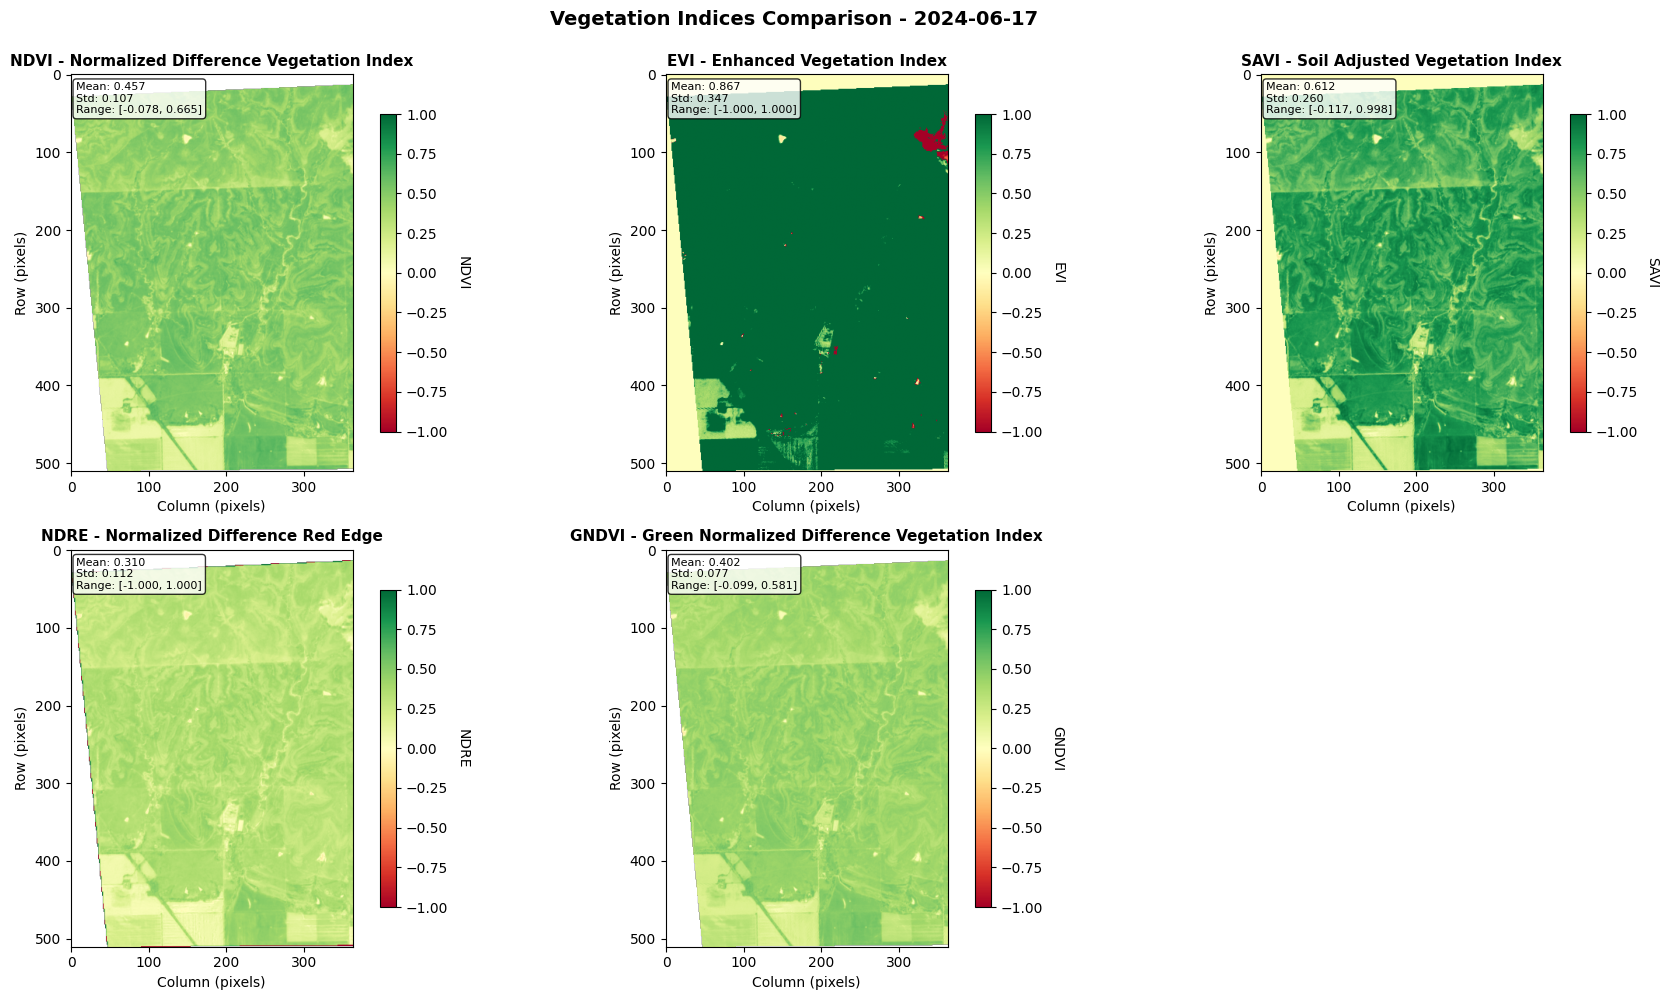

In [7]:
if results:
    computer.visualize_indices(
        results,
        scene_id=f"{selected_item.datetime.strftime('%Y-%m-%d')}",
        save_path="tutorial_output/comparison.png"
    )
else:
    print("⚠️ No results to visualize")


### 💡 What To Look For:

**NDVI vs EVI:**
- In dense areas, EVI shows more contrast than NDVI
- NDVI may appear "saturated" (all values near 0.8)
- EVI reveals finer distinctions in healthy vegetation

**NDVI vs SAVI:**
- In sparse areas, SAVI often shows higher values
- SAVI is less affected by bright soil
- Look at the statistics - SAVI mean often higher

**NDVI vs NDRE:**
- NDRE is more sensitive to subtle variations
- NDRE values tend to be lower overall (different scale)
- NDRE can show stress that NDVI misses

**NDVI vs GNDVI:**
- Often look similar in pattern
- GNDVI may have slightly higher values
- Both show general vegetation health


---

## 📈 Part 6: Statistical Comparison


In [8]:
if results:
    stats = computer.compute_statistics(results)
    
    print("📊 STATISTICAL COMPARISON\
")
    print("="*70)
    print(f"{'Index':<10} {'Mean':<10} {'Std Dev':<10} {'Min':<10} {'Max':<10}")
    print("="*70)
    
    for idx_name in ['ndvi', 'evi', 'savi', 'ndre', 'gndvi']:
        if idx_name in stats and 'error' not in stats[idx_name]:
            s = stats[idx_name]
            print(f"{idx_name.upper():<10} {s['mean']:<10.3f} {s['std']:<10.3f} {s['min']:<10.3f} {s['max']:<10.3f}")
    
    print("="*70)
else:
    print("⚠️ No statistics available")


📊 STATISTICAL COMPARISON
Index      Mean       Std Dev    Min        Max       
NDVI       0.457      0.107      -0.078     0.665     
EVI        0.867      0.347      -1.000     1.000     
SAVI       0.612      0.260      -0.117     0.998     
NDRE       0.310      0.112      -1.000     1.000     
GNDVI      0.402      0.077      -0.099     0.581     


---

## 🎯 Part 7: Decision Framework - Which Index When?

### Quick Reference Table

| Scenario | Primary Index | Secondary Index | Why? |
|----------|---------------|-----------------|------|
| **Early Season** (seedlings) | SAVI | NDVI | Soil background correction |
| **Mid Season** (vegetative growth) | NDVI | GNDVI | General health monitoring |
| **Late Season** (mature, dense) | EVI | NDVI | Avoids saturation |
| **Nitrogen Planning** | NDRE | GNDVI | Chlorophyll sensitivity |
| **Drought Monitoring** | NDVI | EVI | Vegetation stress detection |
| **Disease Detection** | NDRE | GNDVI | Early chlorophyll changes |
| **Sparse Vegetation** (< 50%) | SAVI | NDVI | Soil correction |
| **Dense Forests** | EVI | NDVI | No saturation |
| **Variable Rate Application** | NDRE | EVI | High spatial sensitivity |


---

## 🌾 Part 8: Real-World Scenarios

### Scenario 1: Early Season Corn

**Situation:** Corn planted 3 weeks ago, 15-20 cm tall, lots of soil visible

**Solution:** Use SAVI to reduce soil interference

```python
results = compute_vegetation_indices_for_aoi(
    aoi_input=corn_field,
    start_date="2024-05-15",
    end_date="2024-05-30",
    indices=['savi', 'ndvi'],  # Compare
    visualize=True
)
```

**Expected:** SAVI values higher than NDVI, better contrast between planted areas

### Scenario 2: Mid-Season Nitrogen Management

**Situation:** Wheat at tillering, need variable rate nitrogen prescription

**Solution:** Use NDRE for maximum sensitivity

```python
results = compute_vegetation_indices_for_aoi(
    aoi_input=wheat_field,
    start_date="2024-04-01",
    end_date="2024-04-15",
    indices=['ndre', 'gndvi', 'ndvi'],  # NDRE is key!
    collection='sentinel-2-l2a',  # Required for NDRE
    visualize=True
)
```

**Action:**
- Low NDRE (< 0.20): High nitrogen rate
- Medium NDRE (0.20-0.30): Standard rate
- High NDRE (> 0.30): Reduced rate

### Scenario 3: Dense Soybean Canopy

**Situation:** Soybeans at R3-R4, NDVI all above 0.75, need to detect subtle differences

**Solution:** Use EVI to maintain sensitivity

```python
results = compute_vegetation_indices_for_aoi(
    aoi_input=soybean_field,
    start_date="2024-07-15",
    end_date="2024-07-31",
    indices=['evi', 'ndvi'],  # Compare
    visualize=True
)
```

**Expected:** EVI shows more variation than saturated NDVI


---

## 🚀 Part 9: Production Use

For real-world analysis, use the high-level function that handles everything!


In [9]:
# Run comprehensive multi-scene analysis
# Uncomment and modify for your area:

# production_results = compute_vegetation_indices_for_aoi(
#     aoi_input="my_field.geojson",  # or coordinates
#     start_date="2024-06-01",
#     end_date="2024-06-30",
#     indices=['ndvi', 'evi', 'savi', 'ndre', 'gndvi'],
#     output_dir="production_analysis",
#     max_cloud_cover=15,
#     visualize=True
# )

print("💡 Uncomment the code above to run production analysis!")
print("   It will process all scenes in the date range automatically.")


💡 Uncomment the code above to run production analysis!
   It will process all scenes in the date range automatically.


---

## 🎓 Part 10: Summary & Best Practices

### What You've Learned

✅ **Five powerful indices**, each optimized for different scenarios  
✅ **When to use each index** based on vegetation density and goals  
✅ **How to compute efficiently** - loading bands once for multiple indices  
✅ **Interpreting differences** between indices  
✅ **Real-world applications** in precision agriculture  

### Key Takeaways

1. **No single "best" index** - use the right tool for the job
2. **NDRE is powerful** but requires Sentinel-2
3. **SAVI for early season**, EVI for dense canopy, NDVI for general use
4. **Compute multiple indices** to get complete picture
5. **Track over time** for best insights

### Best Practices

**✅ DO:**
- Compute multiple indices when starting analysis
- Use NDRE when available (Sentinel-2)
- Consider crop stage when selecting index
- Track indices over time
- Validate with ground truth

**❌ DON'T:**
- Rely only on NDVI for all applications
- Use SAVI for dense, mature vegetation
- Use EVI for sparse, early season crops
- Compare raw values between different indices
- Ignore atmospheric conditions

### Going Further

- **Multi-temporal analysis**: Track growth curves
- **Statistical analysis**: Correlate with yield data
- **Machine learning**: Classify crop types
- **Integration**: Combine with weather and soil data

**Congratulations! 🎉**

You now have the knowledge to perform comprehensive vegetation health analysis. Go monitor some crops! 🌾🛰️


---

## 🔬 Appendix: Quick Reference

### Index Formulas

| Index | Formula | Bands |
|-------|---------|-------|
| NDVI | (NIR - Red) / (NIR + Red) | B04, B08 |
| EVI | 2.5 × (NIR - Red) / (NIR + 6×Red - 7.5×Blue + 1) | B02, B04, B08 |
| SAVI | ((NIR - Red) / (NIR + Red + 0.5)) × 1.5 | B04, B08 |
| NDRE | (NIR - RedEdge) / (NIR + RedEdge) | B05, B08 |
| GNDVI | (NIR - Green) / (NIR + Green) | B03, B08 |

### Typical Value Ranges

| Index | Bare Soil | Sparse Veg | Moderate Veg | Dense Veg |
|-------|-----------|------------|--------------|------------|
| NDVI | 0.0-0.2 | 0.2-0.4 | 0.4-0.6 | 0.6-0.9 |
| EVI | 0.0-0.2 | 0.2-0.5 | 0.5-0.8 | 0.8-1.2 |
| SAVI | 0.0-0.3 | 0.3-0.5 | 0.5-0.7 | 0.7-1.0 |
| NDRE | 0.0-0.1 | 0.1-0.2 | 0.2-0.4 | 0.4-0.6 |
| GNDVI | 0.0-0.2 | 0.2-0.4 | 0.4-0.6 | 0.6-0.8 |

### Command Line

```bash
# List available indices
vegetation-index-compute --list-indices

# Compute all indices
vegetation-index-compute \
    --aoi field.geojson \
    --start-date 2024-06-01 \
    --end-date 2024-06-30 \
    --indices ndvi evi savi ndre gndvi
```
